In [1]:
import matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy import interpolate
from MyUnit import SIUnit, NaturalUnit
from scipy.interpolate import interp1d

# choose the specific CLASS version
classy_path = '/a/home/cc/students/physics/chensun/tomerv_storage/Code/class_axion/python/build/lib.linux-x86_64-2.7'
import sys
sys.path.insert(1, classy_path)
from classy import Class

import classy
classy.__file__


'/a/home/cc/students/physics/chensun/tomerv_storage/Code/class_axion/python/build/lib.linux-x86_64-2.7/classy.so'

In [2]:
# exercise 0
# Define your cosmology (what is not specified will be set to CLASS default parameters)
params = {
    'gauge':'synchronous',
    'input_verbose' : 1,
    'background_verbose' : 2,
    'thermodynamics_verbose': 1,
    'perturbations_verbose': 2,
    'h': 0.673,
    'omega_b': 0.02205,
    #'omega_cdm': 0.1199,
    'omega_cdm': 0.115,
    'tau_reio': 0.089,
    'A_s':math.exp(3.089)*10**-10,
    'n_s':0.9603,
    'N_ur' : 2.03351,
    'N_ncdm' : 1,
    'm_ncdm' : 0.06,
    'T_ncdm' : 0.715985, 
    'T_cmb' : 2.2755,
    # Output setup
    #'output': 'tCl,pCl,lCl,mPk',
    #'lensing': 'yes',
    #'l_max_scalars': 3000, 
    #'k_output_values':'0.01, 0.1, 1.0, 3.0', 
    #'compute damping scale': 'Y'
}

f=1e-2 # in Mpl,r units
m=1e-22 # in eV units
_eV_Mpc_=1.5637496259e29;
_sqrt_8pi_=5.013256549;

settings_scf = {
    #'Omega_Lambda': 0.6847,
    #'Omega_fld':0. ,
    #'Omega_scf': 0.01,
    #'attractor_ic_scf': 'no',
    'phi_ini_scf': (1.-1e-3)*f,
    'scf_m': m,
    'scf_f': f,
    'scf_w': 0,
    'scf_phiprime_ini': 1e-50,
    'scf_tau_end_over_tau_crit': 8.
    #'scf_parameters': '8., 0, 1e-50',
    #'scf_parameters': '1.56e7, %s, 8., 0, 1e-50' %f,
    #scf_parameters = [scf_m, scf_f, multip, w, phi_prime]
}

try:
    cosmo.struct_cleanup()
except:
    pass
# Create an instance of the CLASS wrapper
cosmo = Class()

# Set the parameters to the cosmological code
cosmo.set(params)
cosmo.set(settings_scf)
cosmo.compute()

print cosmo.age()


12.5063499965


In [3]:
# # debugging
# import matplotlib
# %matplotlib notebook
# import numpy as np
# import matplotlib.pyplot as plt


# plt.subplots()
# plt.yscale('log')
# plt.xscale('log')
# path = '/a/home/cc/students/physics/chensun/tomerv_storage/Code/class_axion/test_phi_of_tau_after.txt'
# data = []
# with open(path, 'r') as f:
#     for line in f:
#         line_list = line.split()
#         data.append(line_list)
# data = np.asarray(data)
# data = data.astype(float)
# plt.plot(data[:,0], np.abs(data[:,1]), '.',markersize=.1)

# # plt.subplots()
# # plt.yscale('log')
# # plt.xscale('log')
# # path = '/a/home/cc/students/physics/chensun/tomerv_storage/Code/class_axion/test_V_of_tau_after.txt'
# # data = []
# # with open(path, 'r') as f:
# #     for line in f:
# #         line_list = line.split()
# #         data.append(line_list)
# # data = np.asarray(data)
# # data = data.astype(float)
# # plt.plot(data[:,0], np.abs(data[:,1]), '.',markersize=.1)
# # end of debugging

In [4]:
background = cosmo.get_background()
print '----background keys: '
print background.keys()
print '\n\n'

# thermodynamics = cosmo.get_thermodynamics()
# print '----thermodynamics keys: '
# print thermodynamics.keys()
# print '\n\n'

# perturbations = cosmo.get_perturbations()
# print '----perturbations keys: '
# print perturbations['scalar'][0].viewkeys()
# print '\n\n'

# print '----CMB power spectra keys: '
# print cosmo.lensed_cl(3000).viewkeys()
# print '\n\n'

# z_rec = cosmo.get_current_derived_parameters(['z_rec'])['z_rec']
# print z_rec

# z_eq = cosmo.get_current_derived_parameters(['z_eq'])['z_eq']
# print z_eq

# # tau_eq = np.interp(z_eq, background['z'], background['conf. time [Mpc]'])
# tau_eq = interp1d(background['z'], background['conf. time [Mpc]'], kind='cubic')(z_eq)
# print tau_eq

----background keys: 
['(.)rho_crit', 'V_scf', '(.)p_scf', '(.)p_tot_prime', '(.)rho_cdm', 'phi_scf', '(.)rho_ur', '(.)rho_tot', '(.)rho_lambda', '(.)p_prime_scf', 'ang.diam.dist.', 'proper time [Gyr]', "V'_scf", 'H [1/Mpc]', 'conf. time [Mpc]', '(.)p_tot', 'lum. dist.', "V''_scf", 'gr.fac. f', '(.)rho_scf', '(.)p_ncdm[0]', 'comov. dist.', 'comov.snd.hrz.', '(.)rho_b', '(.)rho_g', 'gr.fac. D', "phi'_scf", 'z', '(.)rho_ncdm[0]']





<IPython.core.display.Javascript object>


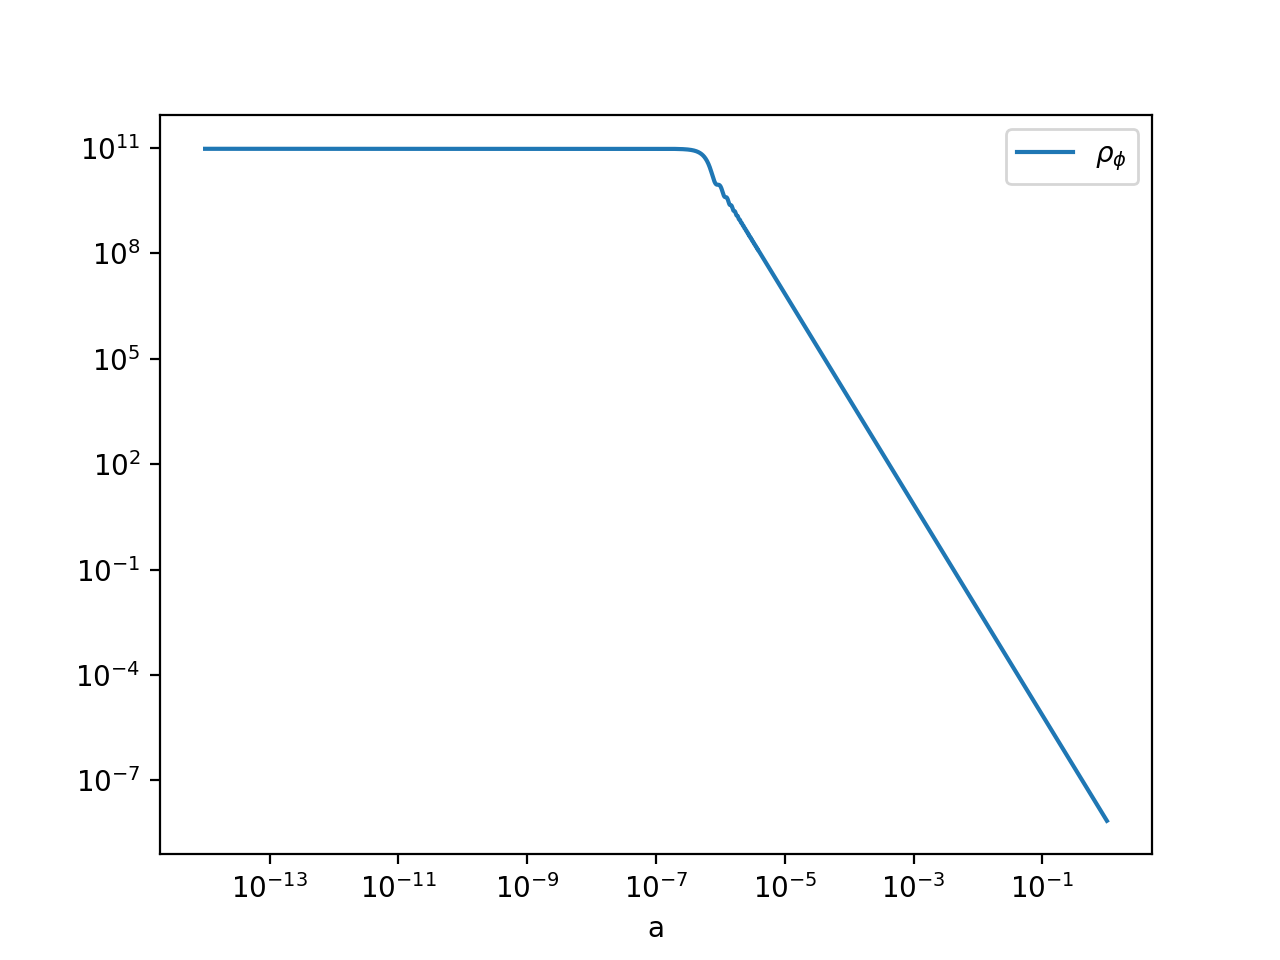

In [5]:
plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('a')
plt.plot(1/(1+background['z'][:]), background['(.)rho_scf'][:], '-', label=r"$\rho_{\phi}$")
plt.legend(loc='best')
#plt.xlim(5e-8, 1e-5)
#plt.ylim(1e4, 1e11)

<IPython.core.display.Javascript object>


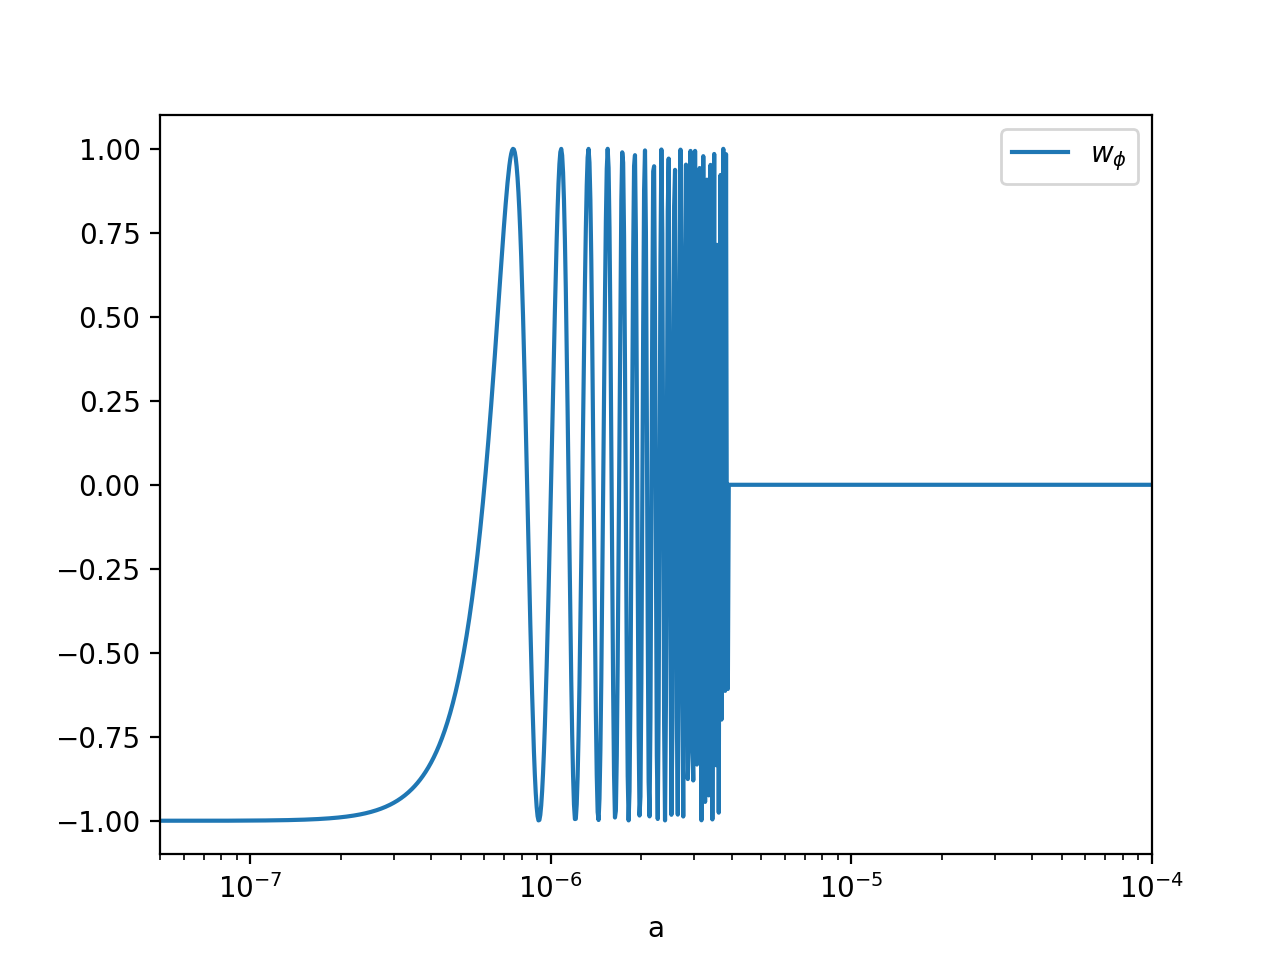

(5e-08, 0.0001)

In [6]:
plt.subplots()
plt.xscale('log')
plt.xlabel('a')
plt.plot(1/(1+background['z'][:]), background['(.)p_scf']/background['(.)rho_scf'], '-', label=r"$w_{\phi}$")
plt.legend(loc='best')
plt.xlim(5e-8, 1e-4)
#plt.ylim(1e4, 1e11)